In [1]:
# Decomposition in  time series means breaking down time series into its main component like trend , seasonality and noise(Residuals)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2020-01-31    15.418915
2020-02-29    17.606717
2020-03-31    22.757672
2020-04-30    19.834546
2020-05-31    16.021543
Freq: M, dtype: float64

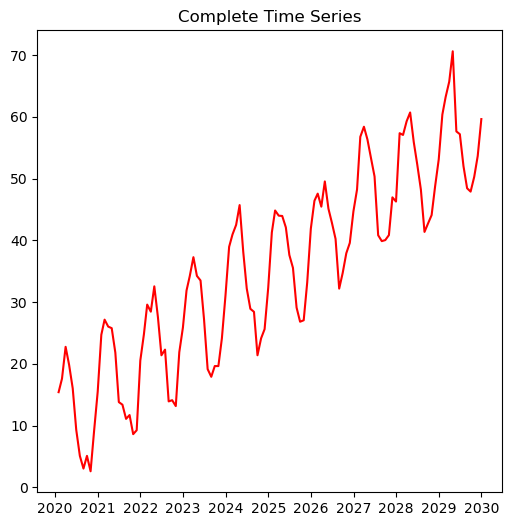

In [15]:
# create a time series 


date_range = pd.date_range(start = '2020-01-01' , periods = 120 , freq = 'M')

trend = np.linspace(10 , 60 , 120)

seasonality=  10 * np.sin(2 * np.pi * date_range.month / 12)

noise = np.random.normal(0 ,2 ,len(date_range))


time_series = trend + seasonality + noise


plt.figure(figsize = (6,6))
plt.plot(date_range , time_series , color = 'Red')
plt.title("Complete Time Series")



original = pd.Series(time_series, index=date_range)
original



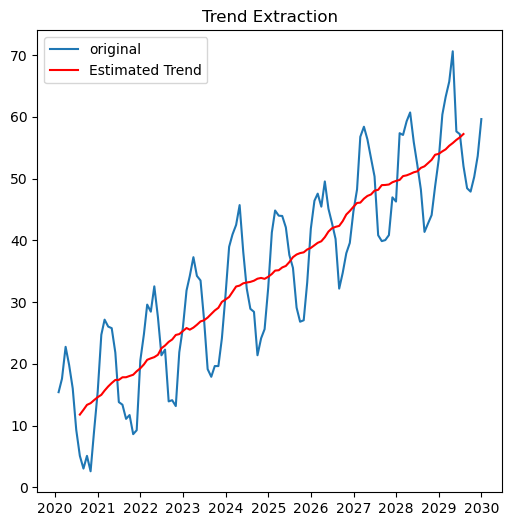

In [27]:
# Estimate the trend

trend_estimate = original.rolling(window = 12 , center = True).mean()
trend_estimate


plt.figure(figsize = (6,6))
plt.plot(original, label = 'original')
plt.plot(trend_estimate , label = 'Estimated Trend' , color = 'Red')
plt.legend()
plt.title("Trend Extraction")
plt.show()

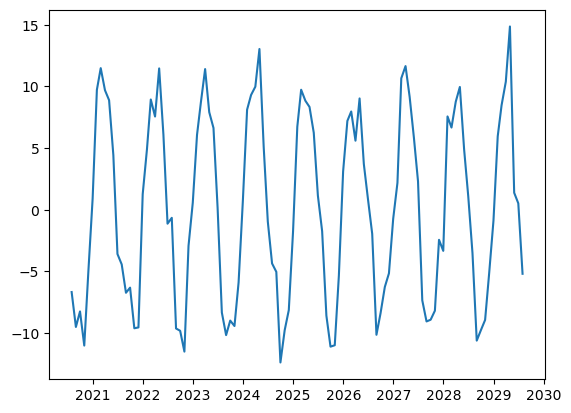

In [31]:
# Remove trend to get detrended series

detrended_series = original - trend_estimate

plt.plot(detrended_series)

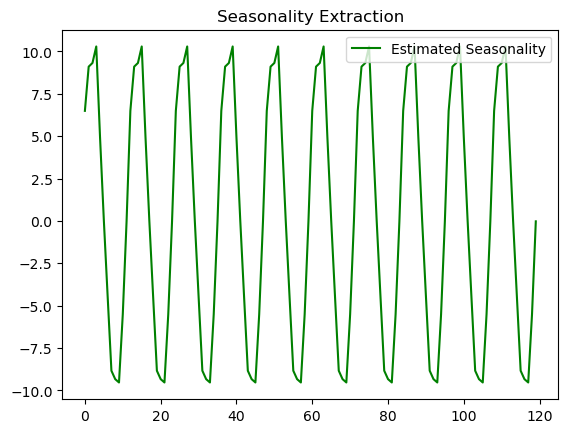

In [47]:
# Estimating seasonality 

month = detrended_series.groupby(original.index.month ).mean()

# Map the month means back to the full series
seasonality_estimate = original.index.month.map(month)



plt.figure()
plt.plot(seasonality_estimate, label="Estimated Seasonality", color="green")
plt.legend()
plt.title("Seasonality Extraction")
plt.show()

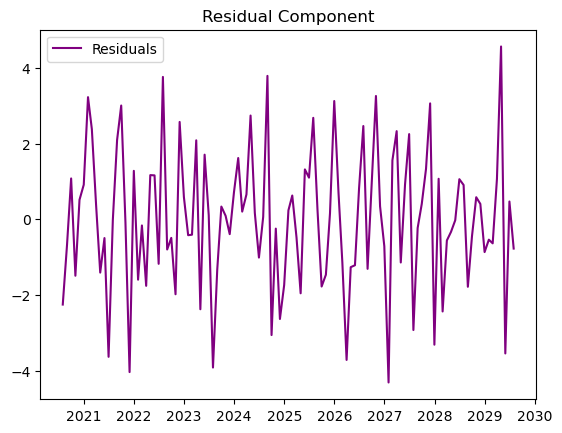

In [48]:
residual = time_series - trend_estimate - seasonality_estimate

plt.figure()
plt.plot(residual, label="Residuals", color="purple")
plt.legend()
plt.title("Residual Component")
plt.show()

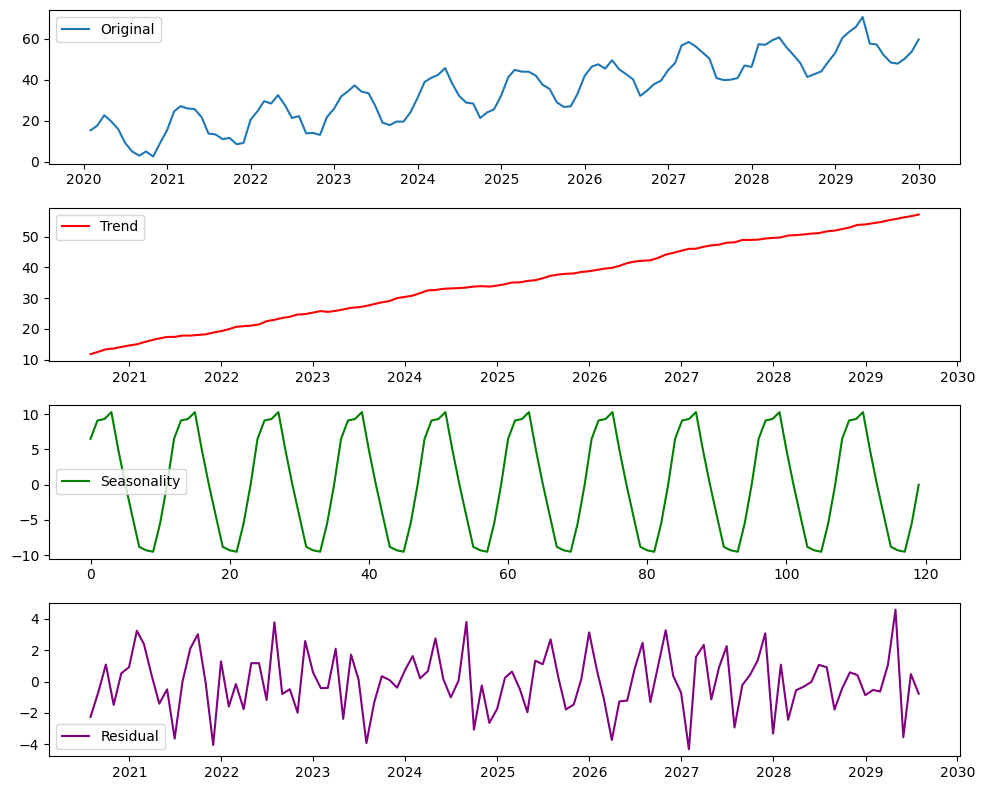

In [49]:
# Combine all component

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(original, label="Original")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend_estimate, label="Trend", color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonality_estimate, label="Seasonality", color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label="Residual", color="purple")
plt.legend()

plt.tight_layout()
plt.show()

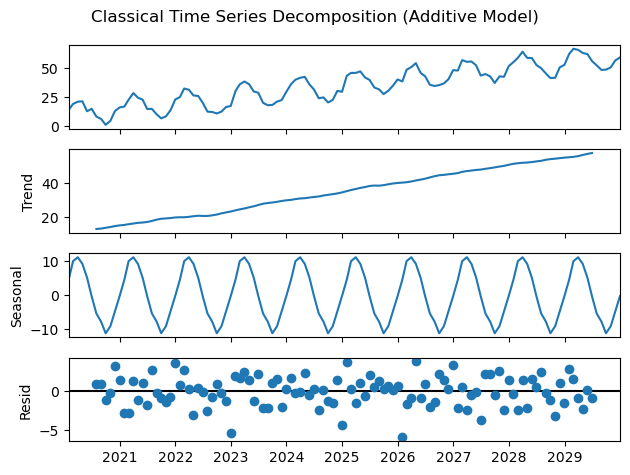

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# create a synthetic time series

time_series = pd.date_range(start = '2020-01-01' , periods = 120 , freq = 'M')

trend = np.linspace(10 , 60 ,120) 

seasonality = 10 * np.sin(2 * np.pi  * date_range.month / 12)

noise = np.random.normal(0 , 2, len(date_range))


time_series = pd.Series(trend + seasonality + noise , index = date_range)


result = seasonal_decompose(time_series , model = 'additive' , period = 12)



result.plot()
plt.suptitle("Classical Time Series Decomposition (Additive Model)")
plt.tight_layout()
plt.show()      


